# Capstone; Predicting the price of crypto art

In this notebook the code for my capstone will be nicely explained and commented. Below I will start by extracting the data from the csv files.


In [2]:
import csv
import pandas
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime
from collections import Counter
import random
from statistics import mean


In [3]:
#if any of the used feautures has a NaN value it not be used.
df_sales2 = pandas.read_csv("sales2.csv")
c = df_sales2.columns[0:7]
df_sales = df_sales2.dropna(subset=c)
df_tokens = pandas.read_csv("tokens2.csv")

#every column is converted to a list since it is easier to work with but the index is now important since any change
#could mess up the data
usd_sales = df_sales['usd'].tolist()
tokenId_sales = df_sales['tokenId'].tolist()
timestamp_sales = df_sales['timestamp'].tolist()
buyer_sales = df_sales['buyer'].tolist()
seller_sales = df_sales['seller'].tolist()
rate_sales = df_sales['rate'].tolist()

creator_tokens = df_tokens['creator'].tolist()
tokenId_tokens = df_tokens['tokenId'].tolist()

#example of timestamp_sales
print(timestamp_sales[:5])

['2018-04-05T23:50:12Z', '2020-01-18T16:16:42Z', '2021-01-05T00:47:24Z', '2018-04-05T23:59:06Z', '2018-09-05T21:06:04Z']


Below I will make a basic matrix with the features; the year, month and week it got sold and the artist of the artwork. The artist will only be unique when he made 40 or more sales, else he will go in the "other" category.

[263, 478, 1877, 2782]


'\nall works according to plan\nprint(usd_sales[263])\nprint(usd_sales[478])\nprint(usd_sales[1877])\nprint(usd_sales[2782])\n\nprint(timestamp_sales[263])\nprint(timestamp_sales[478])\nprint(timestamp_sales[1877])\nprint(timestamp_sales[2782])\n\nprint(value[263])\nprint(value[478])\nprint(value[1877])\nprint(value[2782])\n'

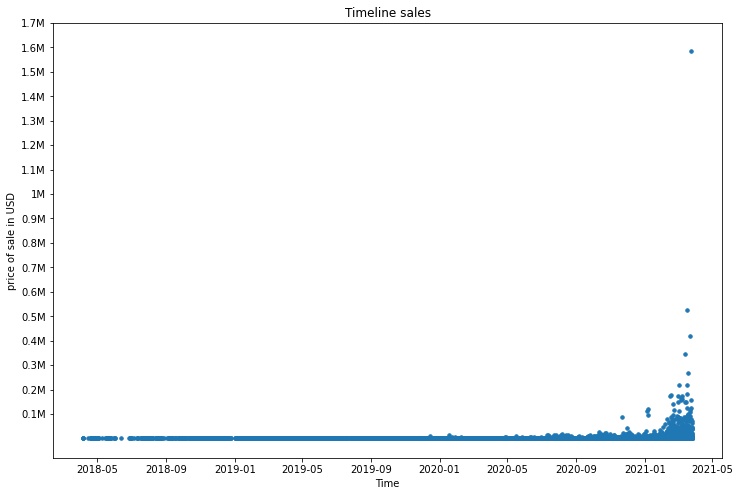

In [4]:
#making the matrix with all the features
matrix_basic = np.zeros((len(timestamp_sales),8))

count = 0
#first day something got sold in this dataset. 
first_day = datetime.datetime(2018, 4, 5)

#list with datetime.datetime of sale of every sale
lstdays = []

#list with days since first sale of every sale
lstdays2 = []


for i in timestamp_sales:
    date = i.split("T")[0]
    time = i.split("T")[1][0:-1]
    #getting a datetime format out of timestamps.
    date2 = datetime.datetime(int(date[0:4]),int(date[5:7]),int(date[8:]),hour = int(time[0:2]),minute = int(time[3:5]), second = int(time[6:]))
    date_year = date[:4]
    date_months = date[5:7]
    date_days = date[8:]
    matrix_basic[count][0] = int(date_year) - 2017 
    matrix_basic[count][1] = int(date_months)
    matrix_basic[count][2] = math.ceil(int(date_days)/7)
    #print(str(math.ceil(int(date_days)/7)) + " " + str(date_days)) #test
    delta = date2 - first_day
    daydiff = delta.days
    lstdays.append(date2)
    lstdays2.append(daydiff)
    count = count + 1
#the first 10 dates have been tested 
    
fig, ax6 = plt.subplots(figsize=(12,8))
ax6.scatter(lstdays, usd_sales,s=12)
ax6.set_ylabel("price of sale in USD")
ax6.set_xlabel("Time")
ax6.set_title("Timeline sales")
ax6.set_yticks([100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000])
ax6.set_yticklabels(["0.1M", "0.2M","0.3M", "0.4M", "0.5M","0.6M","0.7M","0.8M","0.9M","1M","1.1M","1.2M","1.3M","1.4M","1.5M","1.6M","1.7M"])
#dict with keys tokens and values creator
dict_toccrea = dict()
countt = 0
for i in tokenId_tokens:
    #print(len(creator_tokens)) #22232
    dict_toccrea[i] = creator_tokens[countt]
    countt = countt + 1
    
listwcreato = []
for i in tokenId_sales:

    listwcreato.append(dict_toccrea[i])

dictcrea = dict()

#listwcreato first 10 have been tested and are correct
countercreator = Counter(listwcreato)
count7 = 0
count7_1 = 2
#if the artist has sold more than 40 artworks he will get an unique vale in the dictionary
for i in listwcreato:
    if countercreator[i] >= 40:
        if i in dictcrea.keys():
            matrix_basic[count7][3] = dictcrea[i]
            count7 = count7 + 1
        else:
            dictcrea[i] = count7_1
            matrix_basic[count7][3] = dictcrea[i]
            count7 = count7 + 1
            count7_1 = count7_1 + 1  
    else:
        matrix_basic[count7][3] = 1
        count7 = count7 + 1

        
#print(matrix_basic[263,:])
#print(matrix_basic[478,:])
#print(matrix_basic[1877,:])
#matrix first three columns are tested and work. 

#the value of past artworks sold by the creator.
#source: https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
#gets all duplicates
def duplicates(lst, item):
    lst_dupl = []
    count1 = 0
    for i in lst:
        if i == item:
            lst_dupl.append(count1)
            count1 =count1 +1
        else:
            count1 =count1 +1
    return lst_dupl


count3 = 0
lstwithindx = []
#we got a list with all indexes in the sales.csv file that have the same creator
count231 = 0
#test
#print(listwcreato[263])
#print(listwcreato[478])
#print(listwcreato[1877])
#print(listwcreato[2782])
for i in listwcreato:
    lst = duplicates(listwcreato, i)
    lstwithindx.append(lst)

#part of test
for i in range(len(lstwithindx)):
    if  3 < len(lstwithindx[i]) < 5:
        r = i
        break

print(lstwithindx[263])
#lstwithindx got tested for the first 11 and it was correct
count4 = 0
value = []
for i in lstwithindx:
    lst12 = []
    for j in i:
        #when the datetime precedes the sale time then it will get added to the list of values. 
        if lstdays[j] < lstdays[count4]:
            lst12.append(usd_sales[j])
            
    count4 =count4+1
    value.append(lst12)

"""
all works according to plan
print(usd_sales[263])
print(usd_sales[478])
print(usd_sales[1877])
print(usd_sales[2782])

print(timestamp_sales[263])
print(timestamp_sales[478])
print(timestamp_sales[1877])
print(timestamp_sales[2782])

print(value[263])
print(value[478])
print(value[1877])
print(value[2782])
"""

Text(0.5, 1.0, 'Timeline of sale frequency')

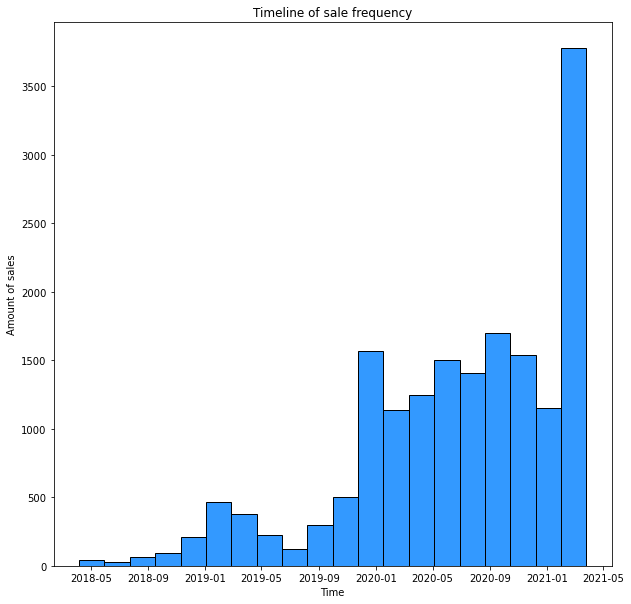

In [5]:
#plotting the amount of sales over time in a histogram
fig, ax7 = plt.subplots(figsize=(10,10))
datafr = pandas.DataFrame(lstdays)
plt.hist(datafr,bins=20,color= "#3399FF", edgecolor='black')
ax7.set_ylabel("Amount of sales")
ax7.set_xlabel("Time")
ax7.set_title("Timeline of sale frequency")

In the list value now all the prices of past artworks of the same creator are represented. The average will be taken to get a nice feature. However there are still some special cases to deal with. What to do when the list is empty and when it is the first artwork of a creator or when it is the first artwork ever sold on this platform. It was decided to take out these datapoints.

In [6]:
avg_value = []
count9 = 0 
for i in value:
    #first artwork ever
    if count9 == 0:
        avg_value.append(np.NaN)
        count9 = count9 + 1
        continue
    #first artwork of creator 
    elif i == [] and count9 != 0:
        avg_value.append(np.NaN)
    
    #mean of past artwork by same creators
    elif i != []:
        avg_value.append(mean(i))
        count9 = count9 + 1
"""
print(avg_value[263])
print(avg_value[478])
print(avg_value[1877])
print(avg_value[2782])
"""
#adding average value to matrix with a log transformation
count111 = 0
for i in avg_value:
    matrix_basic[count111][4] = math.log(i+1)
    count111 = count111 + 1

count91 = 0
two = []
for i in range(len(matrix_basic[:,3])):        
        #days of art since first sale. 
        dateofart = lstdays2[count91]
        two_weeks = []
        count10 = 0
        #getting all artworks indecis 2 weeks before till artwork.
        for j in lstdays2:
            if dateofart > j >= (dateofart-14):
                two_weeks.append(count10)
                count10 = count10 + 1
            else:
                count10 = count10 + 1
        sales = []
        for k in two_weeks:
            sales.append(usd_sales[k])
        
        r13 = math.log(np.mean(sales) + 1)
        matrix_basic[count91][5] = r13
        count91 = count91 + 1
        

H:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
H:\anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
from collections import Counter

#feature buyer

#add buyer with unique number if he did more than 15 buys
dictbuy = dict()
count22 = 0
count33 = 1
coun = Counter(buyer_sales)


for i in buyer_sales:
    
    if i in dictbuy.keys():
            count22 = count22 + 1
    else:
        dictbuy[i] = count33
        count33 = count33 + 1
        count22 = count22 + 1
#check whether counter of number is higher then 15
dict_buy15 = dict()
count_2_1 = 2
other = 1
for i in dictbuy.keys():
    if coun[i] >= 15:
        dict_buy15[i] = count_2_1
        count_2_1 = count_2_1 + 1
    else:
        dict_buy15[i] = other       

counte = 0
#adding this feature to the matrix
for i in range(len(matrix_basic)):
    if buyer_sales[i] in dict_buy15.keys():
        matrix_basic[i][6] = dict_buy15[buyer_sales[i]]
    else:
        matrix_basic[i][6] = 1


#feature seller

#add sale guy with unique number if he did more than 15 sales        
dictsell = dict()
count4 = 0
count5 = 1
for i in seller_sales:
    if i in dictsell.keys():
        count4 = count4 + 1
    else:
        dictsell[i] = count5
        count4 = count4 + 1
        count5 = count5 + 1      

coun2 = Counter(seller_sales)

dict_sell15 = dict()
count2_2_1 = 2
other2 = 1
for i in dictsell.keys():
    if coun2[i] >= 15:
      
        dict_sell15[i] = count2_2_1
        count2_2_1 = count2_2_1 + 1
    else:
        
        dict_sell15[i] = other2 

for k in range(len(matrix_basic)):
    if seller_sales[k] in dict_sell15.keys():
        matrix_basic[k][7] = dict_sell15[seller_sales[k]]
    else:
        matrix_basic[k][7] = 1

Now that we have our 8 basic features ready we should look at whether the features correlate, because if they do the linear regression will not work. So we will need to do some profiling.

In [8]:
from pandas_profiling import ProfileReport
#source: https://github.com/Giovanni1085/covid-19_wikipedia/blob/master/Notebook_5_regression.ipynb
#make a dataframe again from a matrix
reg_ytrue = []
for i in usd_sales:
    #log transformation
    r123 = math.log(i + 1)
    reg_ytrue.append(r123)
    
#added target vector to matrix
result = np.column_stack((matrix_basic, reg_ytrue))    
    
dataframe = pandas.DataFrame(result)
print(dataframe.head)

r22 = dataframe.dropna()
r22.reset_index(drop=True, inplace=True) #this will reset the df_index so that it does not show in the report

profile = ProfileReport(r22, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

<bound method NDFrame.head of          0    1    2    3         4         5     6      7          8
0      1.0  4.0  1.0  2.0       NaN       NaN   2.0    2.0   5.172899
1      3.0  1.0  3.0  2.0  6.498915  5.056918   3.0    3.0   9.476620
2      4.0  1.0  1.0  2.0  7.758536  7.213486   1.0    1.0  11.611141
3      1.0  4.0  1.0  2.0  5.172899       NaN   2.0    2.0   5.172899
4      1.0  9.0  1.0  2.0  6.455458  4.440312   4.0    3.0   6.048080
...    ...  ...  ...  ...       ...       ...   ...    ...        ...
17474  4.0  3.0  4.0  1.0       NaN  9.145101   1.0    1.0   7.594092
17475  4.0  3.0  4.0  1.0  7.743838  9.145101   1.0  235.0   8.980009
17476  4.0  3.0  4.0  1.0       NaN  9.145101  49.0    1.0   8.469267
17477  4.0  3.0  4.0  1.0  8.381924  9.145101   1.0    1.0   8.063907
17478  4.0  3.0  4.0  1.0  7.042147  9.145101   1.0    1.0   7.553291

[17479 rows x 9 columns]>


H:\anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


As you can see in the correlation tab of the report most of the features show some correlation with eachother or the target vector. Feature 4, the average price of previous artworks from the same artist, shows the highest correlation with the target vector.

In [9]:
from scipy.stats import pearsonr

#making it a matrix again
matrix_basic2 = r22.to_numpy() 
df_last = pandas.DataFrame(matrix_basic2)
lst_feat = [matrix_basic2]
#correlation
corr, _ = pearsonr(matrix_basic2[:,4], matrix_basic2[:,8])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.868


Below the six made models are created, tested and plotted.

msq log error = 0.7127066084499669
msqe = 37255855.31859041
Coefficient of determination: 0.39


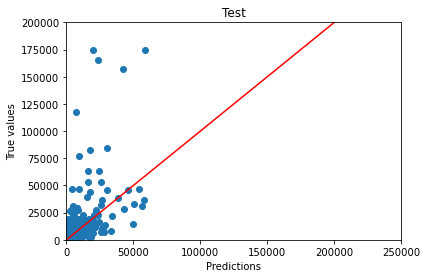

<Figure size 6000x4000 with 0 Axes>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

#shuffle and have a certain seed

for i in lst_feat:
    r = shuffle(i, random_state=1311) 
    training = round(len(i[:,1])*0.8)
    #starts from 10785
    test = training
    X_train = r[:training, :8]
    X_test  = r[test:, :8]
    y_train = r[:training, 8]
    y_test  = r[test:, 8]
    
    #normalising
    norm = MinMaxScaler()
    norm.fit(X_test)
    X_train_norm = norm.transform(X_train)

    # transform testing data
    X_test_norm = norm.fit_transform(X_test)
    
    #making linear regression model
    linreg = LinearRegression()
    linreg.fit(X_train_norm,y_train)
    y_pred = linreg.predict(X_test_norm)
          
    y_predxreg = []
    y_truexreg = []
        
    for j in y_pred:
        l = (math.e ** j) - 1
        y_predxreg.append(l)
       
    for k in y_test:
        l2 = (math.e ** k) - 1
        y_truexreg.append(l2)
    
    fig, ax = plt.subplots()
    x = [0,200000]
    y = [0,200000]
    plt.plot(x,y,'r')
    #plt.figure(figsize=(10, 10))
    ax.scatter(y_predxreg,y_truexreg)
    ax.set_ylabel("True values")
    ax.set_xlabel("Predictions")
    ax.set_title("Test")
    #ax.axis("equal")
    ax.set(xlim=(0, 250000), ylim=(0, 200000))
    
    plt.figure(dpi=1000)   
    #plt.savefig('plot1.png', dpi=1000) #for saving
    print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxreg)))
    print("msqe = " + str(mean_squared_error(y_truexreg, y_predxreg)))
    print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg))
    


In [13]:
#here you can see the value of test and value. 
for i in range(10):
    print("this is test vs pred:" + str(y_truexreg[i]) + "   " + str(y_predxreg[i]))

this is test vs pred:19.919999999999998   30.529945079906106
this is test vs pred:11082.679999999995   9306.644747337343
this is test vs pred:67.27499999999998   48.69576491674647
this is test vs pred:48.91199999999999   98.79532813588995
this is test vs pred:1310.4699999999993   1057.603032582946
this is test vs pred:46.53199999999999   34.91791016703109
this is test vs pred:598.2599999999995   505.68704035793616
this is test vs pred:340.6999999999998   251.48143076977712
this is test vs pred:133.55200000000002   189.66796743262313
this is test vs pred:44.054999999999986   66.31088916835611


Below there will be a simple neural network trying to predict the price. 

msq1 = 29217509.223505113
msq1, still regularized = 0.6506984380758671
Coefficient of determination: 0.52
msq log error = 0.6506984380758671


<Figure size 6000x4000 with 0 Axes>

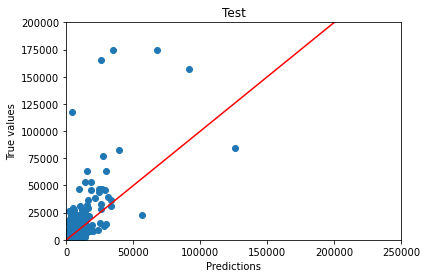

<Figure size 6000x4000 with 0 Axes>

In [14]:
from sklearn.neural_network import MLPRegressor

#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
parameter_space = {
    'hidden_layer_sizes': [(50,50,50) ,(15, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}    
    
clf2 = MLPRegressor(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(15, 10), random_state=40,max_iter=5000, learning_rate= 'adaptive')

#clf3 = GridSearchCV(clf2, parameter_space, cv=5) #best parameters found are: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 10), 
#'learning_rate': 'adaptive', 'solver': 'lbfgs'}

clf2.fit(X_train_norm, y_train)

#print('Best parameters found:\n', clf3.best_params_)
y_hat_test_n = clf2.predict(X_test_norm)
y_predxreg2 = []
for r in y_hat_test_n:
    l3 = math.e ** r - 1
    y_predxreg2.append(l3)
        
print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg2)))
print("msq1, still regularized = " + str(mean_squared_error(y_test, y_hat_test_n)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg2))
print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxreg2)))
        
fig, ax2 = plt.subplots()
ax2.scatter(y_predxreg2,y_truexreg)
ax2.set_ylabel("True values")
ax2.set_xlabel("Predictions")
ax2.set_title("Test")
ax2.set(xlim=(0, 250000), ylim=(0, 200000))

plt.plot(x,y,'r')
plt.figure(dpi=1000) 


msq1 = 37852058.77948322
Coefficient of determination: 0.38
msq log error = 0.7122765244156843


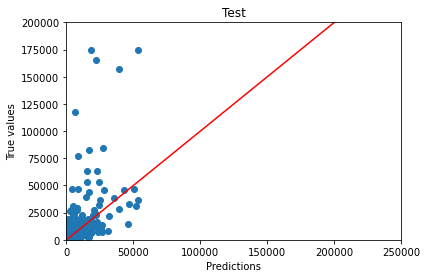

<Figure size 6000x4000 with 0 Axes>

In [15]:
from sklearn.linear_model import ElasticNetCV # cv stands for cross validation and another linear regression model
regr = ElasticNetCV(random_state=1311,cv = 5)
regr.fit(X_train_norm, y_train)
y_pred3 = regr.predict(X_test_norm)
              
y_predxreg3 = []
y_truexreg3 = []
        
for j in y_pred3:
    l = (math.e ** j) - 1
    y_predxreg3.append(l)
            
for k in y_test:
    l2 = (math.e ** k) - 1
    y_truexreg3.append(l2)

print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg3)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg3))

fig, ax3= plt.subplots()
ax3.scatter(y_predxreg3,y_truexreg)
ax3.set_ylabel("True values")
ax3.set_xlabel("Predictions")
ax3.set_title("Test")
ax3.set(xlim=(0, 250000), ylim=(0, 200000))
 
plt.plot(x,y,'r')
plt.figure(dpi=1000)
print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxreg3)))

msq1 = 37264340.75957771
Coefficient of determination: 0.39
msq log error = 0.7126918608556616


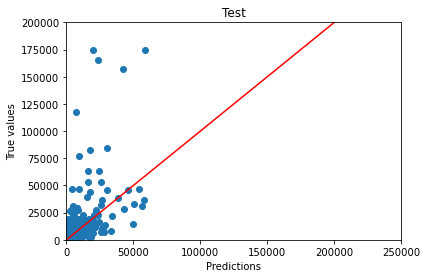

<Figure size 6000x4000 with 0 Axes>

In [16]:
#another form of a linear model of regression
from sklearn.linear_model import BayesianRidge

Baye_Ridge = BayesianRidge()
Baye_Ridge.fit(X_train_norm, y_train)
y_predd = Baye_Ridge.predict(X_test_norm)
y_predxregg = []
y_truexregg = []
        
for j in y_predd:
    l = (math.e ** j) - 1
    y_predxregg.append(l)        
for k in y_test:
    l2 = (math.e** k) - 1
    y_truexregg.append(l2)

print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxregg)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxregg))

fig, axx = plt.subplots()
axx.scatter(y_predxregg,y_truexreg)
axx.set_ylabel("True values")
axx.set_xlabel("Predictions")
axx.set_title("Test")
axx.set(xlim=(0, 250000), ylim=(0, 200000))
 
plt.plot(x,y,'r')
plt.figure(dpi=1000)
print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxregg)))
#ax4.axis("equal")

msq1 = 23582692.195746567
Coefficient of determination: 0.61
msq log error = 0.4290004368354486


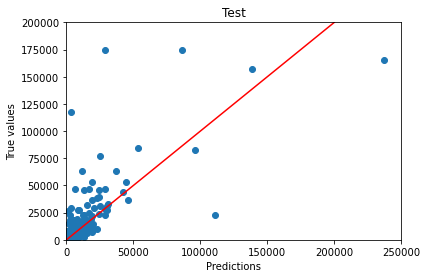

<Figure size 6000x4000 with 0 Axes>

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(n_estimators=250, random_state=0)

regressor.fit(X_train_norm, y_train)
y_pred4 = regressor.predict(X_test_norm)

y_predxreg4 = []
y_truexreg4 = []
        
for j in y_pred4:
    l = (math.e ** j) - 1
    y_predxreg4.append(l)        
for k in y_test:
    l2 = (math.e** k) - 1
    y_truexreg4.append(l2)

print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg4)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg4))

fig, ax4 = plt.subplots()
ax4.scatter(y_predxreg4,y_truexreg)
ax4.set_ylabel("True values")
ax4.set_xlabel("Predictions")
ax4.set_title("Test")
ax4.set(xlim=(0, 250000), ylim=(0, 200000))
 
plt.plot(x,y,'r')
plt.figure(dpi=1000)
print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxreg4)))
#ax4.axis("equal")

msq1 = 34548233.168003626
Coefficient of determination: 0.44
msq log error = 0.5978671330949272


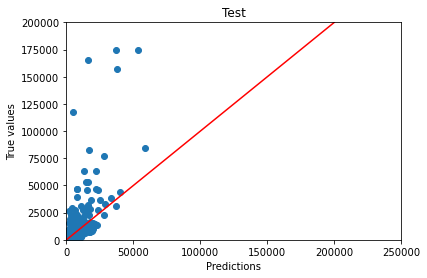

<Figure size 6000x4000 with 0 Axes>

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#using gridsearch to get the best parameters for svm model
svm = svm.SVR()
parameters = {'kernel':('linear', 'rbf'),'C':[1, 10]}
clf4 = GridSearchCV(svm, parameters)
clf4.fit(X_train_norm, y_train)
y_pred5 = clf4.predict(X_test_norm)
      
y_predxreg5 = []
y_truexreg5 = []
        
for j in y_pred5:
    l = (math.e ** j) - 1
    y_predxreg5.append(l)
            
for k in y_test:
    l2 = (math.e** k) - 1
    y_truexreg5.append(l2)

print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg5)))
print('Coefficient of determination: %.2f'
      % r2_score(y_truexreg, y_predxreg5))


fig, ax5 = plt.subplots()
ax5.scatter(y_predxreg5,y_truexreg)
ax5.set_ylabel("True values")
ax5.set_xlabel("Predictions")
ax5.set_title("Test")
ax5.set(xlim=(0, 250000), ylim=(0, 200000))
 
plt.plot(x,y,'r')
plt.figure(dpi=1000)
print("msq log error = " + str(mean_squared_log_error(y_truexreg, y_predxreg5)))